<a href="https://colab.research.google.com/github/javadch/covid19/blob/master/Covid19_Cases_Iran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This document is a try to give an insight into the Corona related data for Iran.

It will be a combination of data processing, analysis, visualization, and reporting. 

The main source of data is https://github.com/javadch/covid19/

This document is maintained by [Javad Chamanara](https://www.rd-alliance.org/users/javad-chamanara)


In [9]:
import datetime as dt
import pandas as pd
import requests
import io
import math
import matplotlib.pyplot as plt

# Loading data
urlIR = 'https://github.com/javadch/covid19/raw/master/data/ir/Covid19_Cases_Iran.xlsx'
iran = pd.read_excel(urlIR, sheet_name='csv', index_col=0).sort_values(by=['DateRep'], ascending=True)
print(iran.tail(5))

             Qom    Teh   Maz   Alb   Sem  ...   Khn   Unn  Cases  Deaths  Recovered
DateRep                                    ...                                      
2020-03-18  22.0  213.0  61.0  76.0  60.0  ...   NaN  13.0   1192   147.0        NaN
2020-03-19  31.0  137.0  58.0  61.0  16.0  ...  21.0   NaN   1046   149.0        NaN
2020-03-20  36.0  220.0  84.0  95.0  52.0  ...  17.0   NaN   1237   149.0        NaN
2020-03-21  20.0  232.0  28.0  55.0   NaN  ...   1.0   NaN    966   123.0        NaN
2020-03-22  17.0  249.0  36.0  60.0   NaN  ...  26.0   NaN   1028   129.0        NaN

[5 rows x 35 columns]


At this point, the data should be ready for consumption. However, no data quality check has been carried out.

Figure 1 shows the daily number of new confirmed cases alongside the number of new daily fatalities. 
While the number of deaths is steadily increasing, the confirmed cases fluctuate fairly too frequently. Being familiar with the culture and government, I can attribute this to bad reporting! However, the chart in Figure 2 suggests a linear increase!! 
This is not similar to usual epidemic models and also does not match with the virus behavior in other countries.

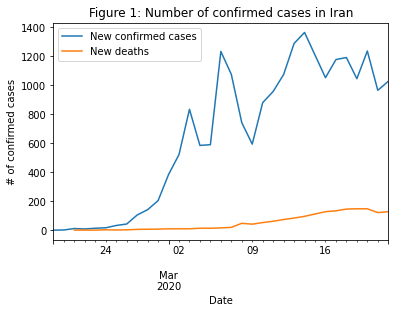

In [10]:
iran['Cases'].plot(legend = True, label = 'New confirmed cases')
iran['Deaths'].plot(legend = True, label = 'New deaths')
plt.xlabel('Date')
plt.ylabel('# of confirmed cases')
plt.title("Figure 1: Number of confirmed cases in Iran")
plt.legend()
plt.show()

Figure 2 shows the same fact but in cumulative mode, which means the total number of cases up to each date.
As mentioned before this does not look normal! Especially because it is not exponential. It is not even polynomial!! It is very much like a linear behavior with a constant coefficient; something like $y = ax+b$ on that $a$ is almost 1! I cannot believe this!!
I order to indicate how abnormal this chart is, I draw the same data from China and Germany alongside this chart in Figure 3.

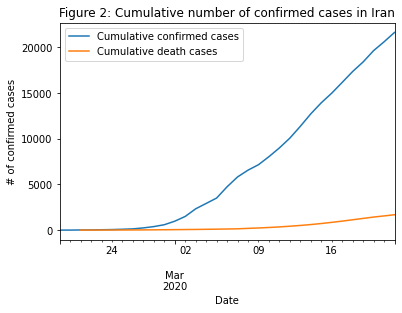

In [11]:
iran['Cases'].cumsum().plot(label = 'Cumulative confirmed cases')
iran['Deaths'].cumsum().plot(label = 'Cumulative death cases')
plt.xlabel('Date')
plt.ylabel('# of confirmed cases')
plt.title("Figure 2: Cumulative number of confirmed cases in Iran")
plt.legend()
plt.show()

Figure 3 obtains Germany and China's COVID19 data from the European CDC as explained in this [article](https://colab.research.google.com/drive/1W0Z7Ya_Waxxr9xbvPneSBj5dMVogrcK0).[link text](https://)


In [0]:
nowUtc = dt.datetime.utcnow()
url_pattern = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-YYYY-MM-DD.xlsx'
# It is possible that ECDC has not yet uploaded the today's data.
# In this case, I fallback to yesterday's dataset
try:
  url = url_pattern.replace('YYYY', '{:04d}'.format(nowUtc.year)).replace('MM', '{:02d}'.format(nowUtc.month)).replace('DD', '{:02d}'.format(nowUtc.day))
  #print(url) 
  data = pd.read_excel(url, index_col=0) 
except: # fallback to yesterday
  nowUtc = nowUtc- dt.timedelta(days=1)
  url = url_pattern.replace('YYYY', '{:04d}'.format(nowUtc.year)).replace('MM', '{:02d}'.format(nowUtc.month)).replace('DD', '{:02d}'.format(nowUtc.day))
  #print(url) 
  data = pd.read_excel(url, index_col=0) 
germany = data[(data['GeoId'] == "DE")].sort_values(by=['DateRep'], ascending=True)
china   = data[(data['GeoId'] == "CN")].sort_values(by=['DateRep'], ascending=True)

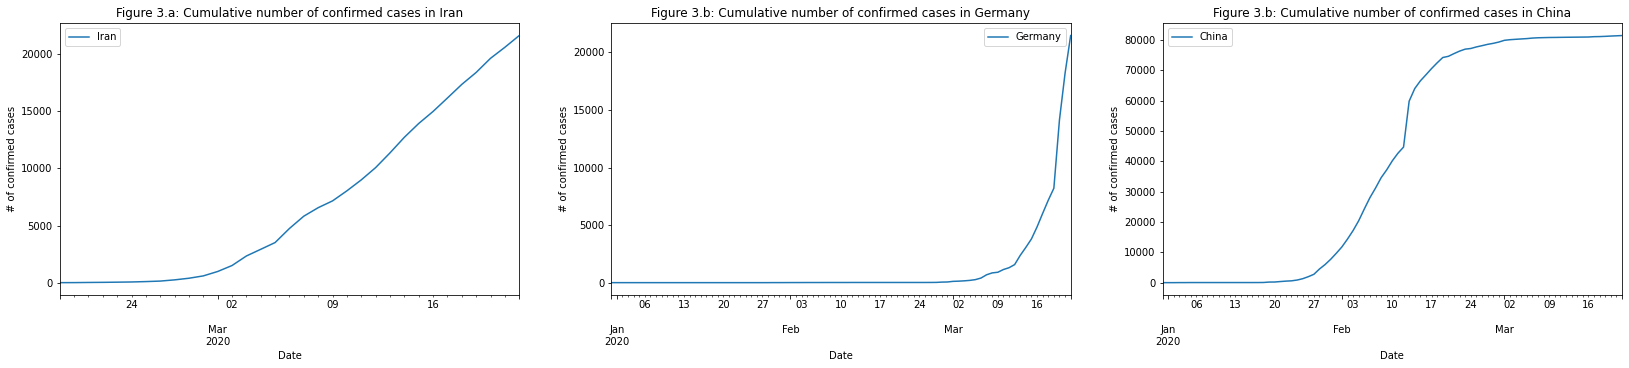

In [13]:
fig, axs = plt.subplots(1,3, figsize=(28, 5))

iran['Cases'].cumsum().plot(ax=axs[0], label = 'Iran')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('# of confirmed cases')
axs[0].set_title("Figure 3.a: Cumulative number of confirmed cases in Iran")
axs[0].legend()

germany['Cases'].cumsum().plot(ax=axs[1], label = 'Germany')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('# of confirmed cases')
axs[1].set_title("Figure 3.b: Cumulative number of confirmed cases in Germany")
axs[1].legend()

china['Cases'].cumsum().plot(ax=axs[2], label = 'China')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('# of confirmed cases')
axs[2].set_title("Figure 3.b: Cumulative number of confirmed cases in China")
axs[2].legend()

plt.show()

And now if I draw all of them in one diagram, it can be seen even better:

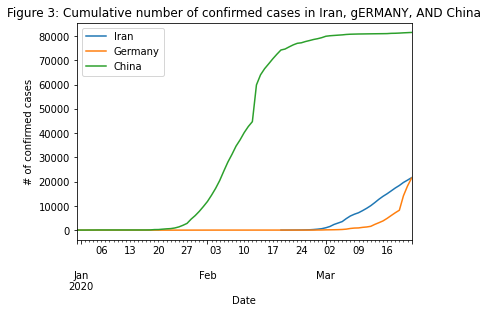

In [14]:
iran['Cases'].cumsum().plot(label = 'Iran')
germany['Cases'].cumsum().plot(label = 'Germany')
china['Cases'].cumsum().plot(label = 'China')

plt.xlabel('Date')
plt.ylabel('# of confirmed cases')
plt.title("Figure 3: Cumulative number of confirmed cases in Iran, gERMANY, AND China")
plt.legend()
plt.show()

China had an epidemic period from 27.01 to 17.02 (28 days) where the infected cases jumped from almost zero to about 60000. They experience a week of stabilization afterward and finally came to flatten curved From 27.03. Although they are maintaining the curve, it is too early to claim the virus is contained.

We see a similar, still more rapid, surge in Germany with its exponential period started on 02.03 and still on the rise. It has reached to about 14000 cases in just two weeks and still does not show any sign of slowing down.

Now, I am wondering how Iran's chart is so steady. Please consider that the China's chart should be 4 times taller than that of Iran and Germany to be visually comparable. Looking at Figure 3.a shows that the first registered cases were on 19.02 (which I will dig into it later), and then only 10 days later the cases have gained their speed. But surprisingly, the spreading speed is only linear!

Another interesting point to be concerned about is that the distance between the first registration to the epidemic point is approximately 60, 30, and 10 days for Germany, China, and Iran respectively.
This shows that a) Iran was not ready to encounter the situation, especially if we consider that the government had about 50 (time difference between the first cases registered in China and Iran) days to be prepared. b) The number of hidden infected people was more than those identified, so the country experienced a rapid increase in the cases in a short time interval.

There can be multiple reasons for this low identification ratio. For example, it can be the instead of patient zero they had a cluster zero. It could also be attributed to the non-availability or lack of testing kits and the limited number of laboratories chosen to carry out the tests.
I can also think of the degree of preparedness of medical staff, protective and safety tools and protocols, the need to train medical staff.

**To be continued ...**